In [1]:
%pylab inline
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from IPython import display
rcParams.update({'figure.max_open_warning': 0})

Populating the interactive namespace from numpy and matplotlib


In [2]:
# solve_ivp functions

# returns vector of dx/dt, dAcx/dt and dAx/dt in that order

def derivs(t, y, nu, xs,K,koff,a0):
    x0 = y[0]               # position of hub
    N = int(0.5*(len(y)-1))   # of lattice sites
    Ac = y[1:N+1]          # bound complex on lattice
    As = y[-N:]             # unbound complex on lattice
    
    dxdt = integrate.trapz(-(x0-xs)*Ac, x=xs)
    binding = exp(-0.5*(x0-xs)**2)*As 
    burnt = nu*Ac
    rebinding = koff/(1+K)*a0-koff*As

    dAcdt = (binding - burnt)
    dAsdt = -binding +rebinding
    
    return array( [dxdt] + list(dAcdt) + list(dAsdt))

In [3]:
# define event as having gone to x = 20.0
def event(t, y):
    x0 = y[0]
        
    return 20.0-x0

event.direction = 0        
event.terminal = True     # stop solver if event satisfied

In [36]:
# use solve_ivp to find solution from t0=0 up to a max tf= 400, but stop if x hits x=20.0

tf = 1000.0


# define domain and lattice
Lmax = 30.0
Lmin = -30.0
dx = 0.1
Nx = int((Lmax-Lmin)/dx) +1
xs = linspace(Lmin, Lmax, Nx)

a0 = 1.0

nu = 1.0
K = 1e-3
koff = 1e-3

In [37]:
sols = []
astdy = a0/(1+koff)
A0x = zeros(Nx)
#A0x = random.normal(astdy,0.1,size = Nx) 
A0x = concatenate((linspace(astdy*0.02,0.0,50),linspace(0.0,astdy,50),ones(Nx-100)*astdy))
x0 = -20.0
Acx = zeros(Nx)


y0 = array([x0] + list(Acx) + list(A0x))

sol = integrate.solve_ivp(lambda t, y: derivs(t, y, nu, xs,K,koff,a0), (0., tf), y0,events = event, method='BDF')
sols.append(sol)

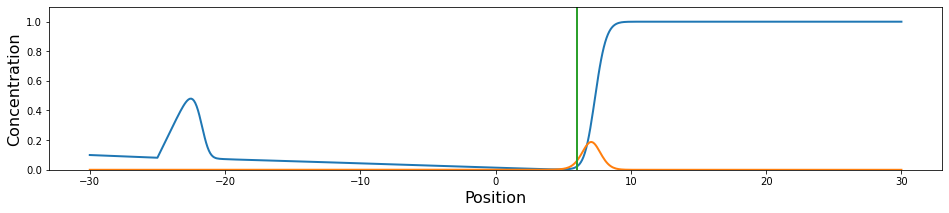

In [ ]:
thick = 2.0
for i in range(3):
    Atmp = sols[i].y[1:]
    ts = sols[i].t
    for t in range(len(ts)):
        Actmp = Atmp[:Nx][:,t]
        Astmp = Atmp[Nx:][:,t]
        if t % 100 == 0:
            display.clear_output(wait=True)
            figure(figsize = (16,3))
            plot(xs,Astmp,linewidth=thick)
            plot(xs,Actmp,linewidth=thick)
            #plot(xAs,ones(Nx)*a0-Astmp, color = "tab:red",linewidth=thick)
            axvline(sols[i].y[0][t], color = "tab:green",linewidth=thick)
            #text(-10,0.2,r"$\tau$ = " +str(round(sol.t[t])))
            ylim(0,a0*1.1)
            xlabel("Position", fontsize = 16)
            ylabel("Concentration", fontsize = 16)
            display.display(gcf())

            cla()
            input()

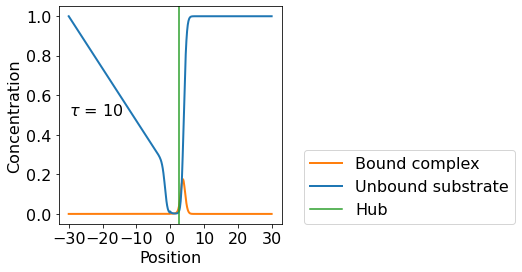

enter '0' to stop0


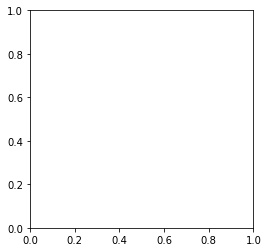

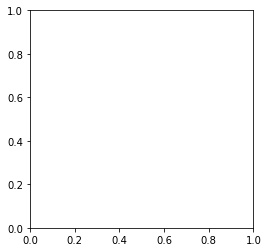

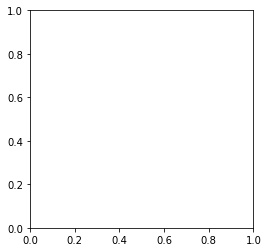

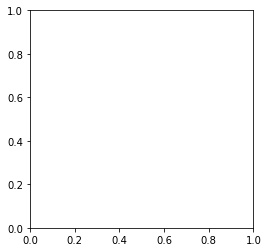

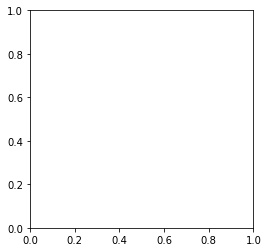

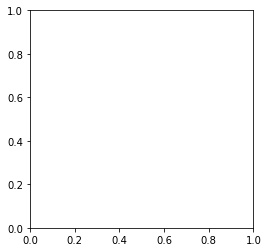

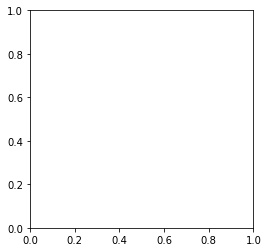

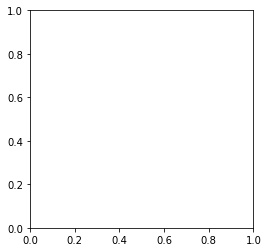

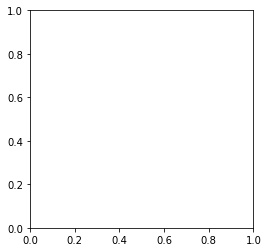

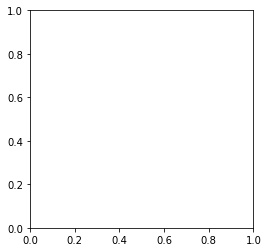

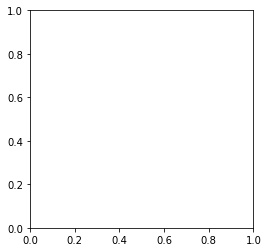

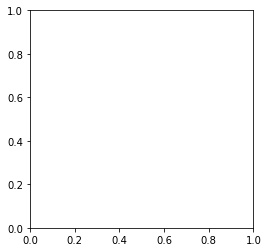

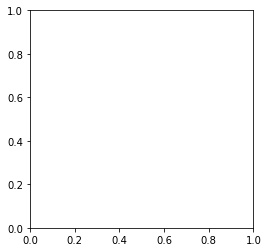

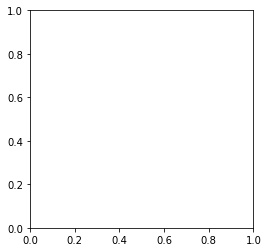

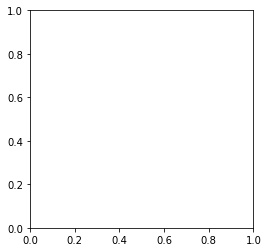

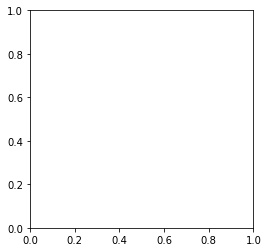

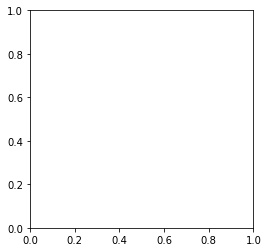

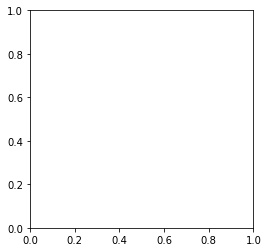

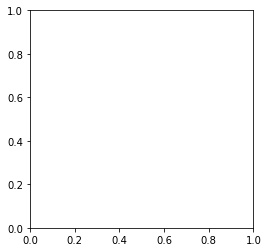

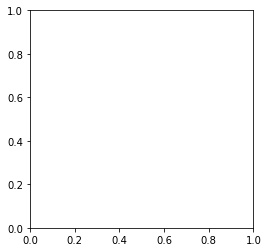

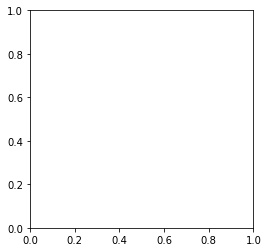

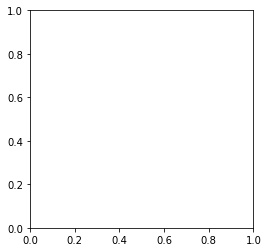

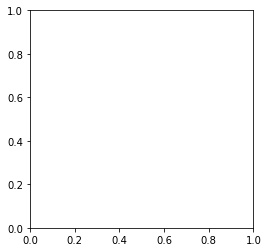

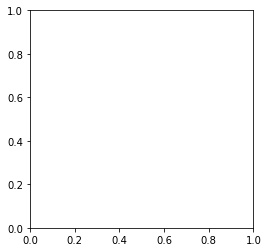

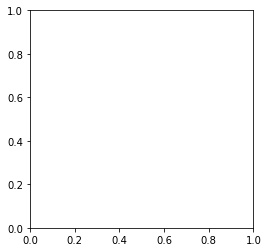

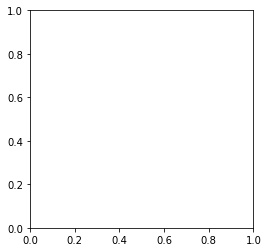

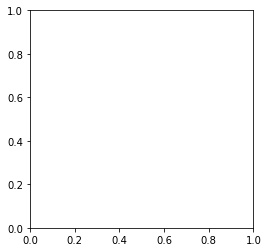

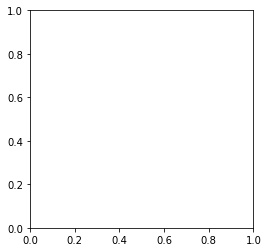

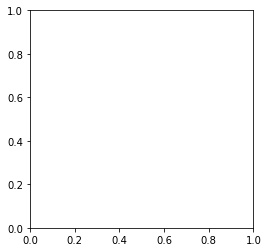

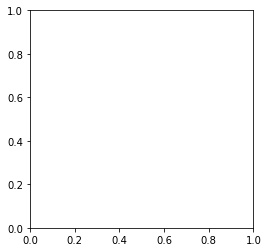

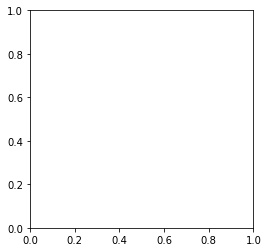

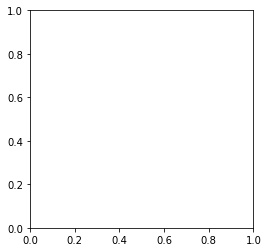

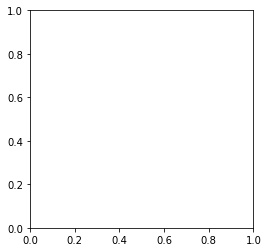

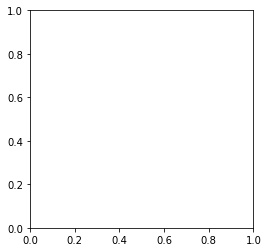

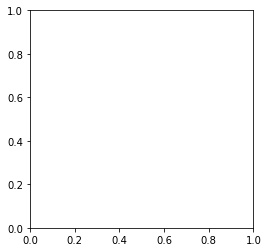

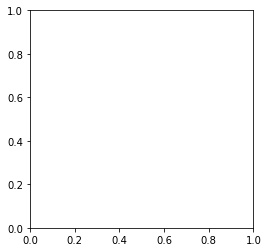

In [64]:
from IPython import display
Atmp = sol.y[1:]
thick = 2.0
done = 1
for t in range(len(Atmp.T)):
    Actmp = Atmp[:Nx][:,t]
    Astmp = Atmp[Nx:][:,t]
    if t % 1 == 0:
        display.clear_output(wait=True)
        figure(figsize = (4,4))
        #plot(xAs,ones(Nx)*a0-Astmp, color = "tab:red",linewidth=thick)
        plot(xs,Actmp,linewidth=thick, color = "tab:orange", label = "Bound complex")
        plot(xs,Astmp,linewidth=thick, color = "tab:blue", label = "Unbound substrate")
        
        if t > 5:
            axvline(sol.y[0][t], color = "tab:green",linewidth=1.5,label = "Hub")
        legend(loc = (1.1,0),fontsize  =16)
        #ylim(0,a0*1.1)""
        xlabel("Position", fontsize = 16)
        ylabel("Concentration", fontsize = 16)
        text(-30,0.5,r"$\tau$ = " + str(round(sol.t[t])), fontsize = 16)
        yticks(fontsize = 16)
        xticks(fontsize = 16)
        display.display(gcf())
        cla()
        done = input("enter '0' to stop")
    if done == "0":
        break
        